## MOMO2号機の圧力履歴と加速度履歴の比較

加速度は
* 機体搭載の加速度センサ
* 光学観測から写真のEXIF情報とピクセル単位での計測
から行った。

圧力履歴は機体搭載の圧力センサからCバンドテレメトリによって得た。


In [2]:
import numpy as np
from numpy import pi, deg2rad, rad2deg, sin, cos
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["savefig.dpi"] = 300
%config InlineBackend.figure_format = 'retina'


In [4]:
# ファイル読み込み
col = [x for x in range(1,155)]
df1 = pd.read_csv("../telemetry_csv/C_band/blank_CSV_understandable_people_only/C_pc1_totallog_chgpoint.csv", names = col)
df_acc = pd.read_csv("../others/MOMO2_連番写真からの高度測定 - csv形式.csv", index_col = False)
time1  = df1[1]

savename = "../telemetry_plot/C_band_telemetry/MOMO2_C_band_"
PC_num = "PC1_"

source_txt = "(Source: C band Telemetry)"

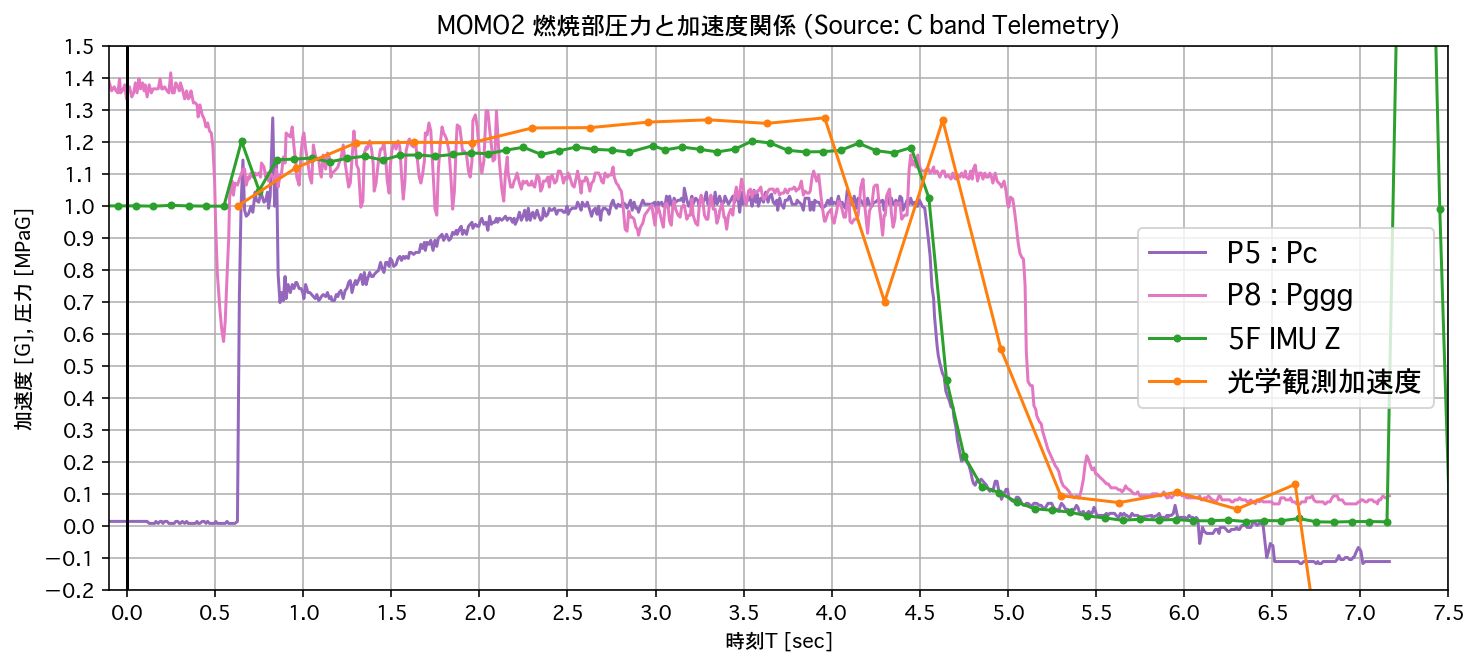

In [5]:
alpha = 1.0
g = 9.80665
plt.figure()
plt.plot(df1[1].loc[df1[38].isnull() == False], df1[38].loc[df1[38].isnull() == False], "-", color="C4", alpha=alpha, label="P5 : Pc")
plt.plot(df1[1].loc[df1[40].isnull() == False], df1[40].loc[df1[40].isnull() == False], "-", color="C6", alpha=alpha, label="P8 : Pggg")
plt.plot(df1[1].loc[df1[90].isnull() == False], df1[90].loc[df1[90].isnull() == False], ".-", alpha=alpha, color="C2", label="5F IMU Z")
plt.plot(df_acc["T [s]"], df_acc["機体加速度 [m/s^2]"]/g + 1, "C1.-", label="光学観測加速度")
plt.grid()
plt.legend(fontsize=14, loc = "center right")
plt.title("MOMO2 燃焼部圧力と加速度関係 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("加速度 [G], 圧力 [MPaG]")
plt.xticks(np.arange(0,12,0.5))
plt.xlim([-0.1, 7.5])
# plt.ylim(ymin=0)
plt.ylim([-0.15, 1.5])
plt.yticks(np.arange(-0.2,1.6,0.1))
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "pressure_acc" + ".png")